<a href="https://colab.research.google.com/github/levynlee/ESAA/blob/main/1129_%ED%95%84%EC%82%AC%EA%B3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://wikidocs.net/52460

## **02. [기초] - 파이토치 기초(PyTorch Basic)**

##**02-01. 파이토치 패키지의 기본 구성**

###**1. torch**
---
메인 네임스페이스이다. 텐서 등의 다양한 수학 함수가 포함되어 있으며 Numpy와 유사한 구조를 가진다.  

###**2. torch.autograd**
---

자동 미분을 위한 함수들이 포함되어 있다. 자동 미분의 on/off를 제어하는 콘텍스트 매니저(enable_grad/no_grad)나 자체 미분 가능 함수를 정의할 때 사용하는 기반 클래스인 Function 등이 포함된다.  

###**3. torch.nn**
---
신경망을 구축하기 위한 다양한 데이터 구조나 레이어 등이 정의되어 있다. 예를 들어 RNN, LSTM과 같은 레이어, ReLU와 같은 활성화 함수, MSELoss와 같은 손실 함수들이 있다.  

###**4. torch.optim**
___
확률적 경사 하강법(SGD)를 중심으로 한 파라미터 최적화 알고리즘이 구현되어 있다.  

###**5. torch.utils.data**
___
SGD의 반복 연산을 실행할 때 사용하는 미니 배치용 유틸리티 함수가 포함되어 있다.  

###**6. torch.onnx**  
___
ONNX(Open Neural Network Exchange)의 포맷으로 모델을 익스포트(export)할 때 사용한다. ONNX는 서로 다른 딥 러닝 프레임워크 간에 모델을 공유할 때 사용하는 포맷이다.


##**02-02. 텐서 조작하기(Tensor Manipulation)**

차원이 없는 값을 스칼라, 1차원으로 구성된 값을 벡터 (1차원 텐서) 라고 한다. 2차원으로 구성된 값을 행렬 (2차원 텐서) 이라고 하며, 3차원 이상이 되면 일반적으로 텐서 (n차원 텐서) 라고 부른다.  

- 2D Tensor (Typical Simple Setting): |t| = (Batch size, dim)  
- 3D Tensor (Typical Computer Vision): |t| = (batch size, width, height)
- 3D Tensor (Typical Natural Language Processing): |t| = (batch size, length, dim)

넘파이로 텐서 만들기

In [ ]:
import numpy as np

In [ ]:
# 1D with numpy
t = np.array([0.,1.,2.,3.,4.,5.,6.])
print(t)

[0. 1. 2. 3. 4. 5. 6.]


In [ ]:
# 1차원 텐서인 벡터의 차원과 크기 출력
print('Rank of t: ', t.ndim)
print('Shape of t: ', t.shape)

Rank of t:  1
Shape of t:  (7,)


In [ ]:
print('t[0] t[1], t[-1] = ', t[0], t[1], t[-1]) # 인덱스를 통한 각 벡터의 원소 접근

t[0] t[1], t[-1] =  0.0 1.0 6.0


In [ ]:
print('t[2:5] t[4:-1] = ', t[2:5], t[4:-1]) # [시작 번호 : 끝 번호]로 범위 지정을 통해 원소 불러오기 (슬라이싱)

t[2:5] t[4:-1] =  [2. 3. 4.] [4. 5.]


In [ ]:
print('t[:2] t[3:] =', t[:2], t[3:]) # 시작 번호를 생략한 경우와 끝 번호를 생략한 경우

t[:2] t[3:] = [0. 1.] [3. 4. 5. 6.]


In [ ]:
# numpy로 2차원 행렬 만들기
t = np.array([[1.,2.,3.], [4.,5.,6.], [7.,8.,9.], [10.,11.,12.]])
print(t)

[[ 1.  2.  3.]
 [ 4.  5.  6.]
 [ 7.  8.  9.]
 [10. 11. 12.]]


In [ ]:
print('Rank of t:', t.ndim)
print('Shape of t:', t.shape)

Rank of t: 2
Shape of t: (4, 3)


파이토치 텐서 선언하기

In [ ]:
import torch

In [ ]:
# 파이토치로 1차원 텐서인 벡터 만들기
t = torch.FloatTensor([0.,1.,2.,3.,4.,5.,6.])
print(t)

tensor([0., 1., 2., 3., 4., 5., 6.])


In [ ]:
print(t.dim()) # rank. 즉, 차원
print(t.shape) # shape
print(t.size()) # shape

1
torch.Size([7])
torch.Size([7])


In [ ]:
print(t[0], t[1], t[-1]) # 인덱스로 접근
print(t[2:5], t[4:-1]) # 슬라이싱
print(t[:2], t[3:]) # 슬라이싱

tensor(0.) tensor(1.) tensor(6.)
tensor([2., 3., 4.]) tensor([4., 5.])
tensor([0., 1.]) tensor([3., 4., 5., 6.])


In [ ]:
# 파이토치로 2차원 텐서인 행렬 만들기
t = torch.FloatTensor([[1.,2.,3.],
                       [4.,5.,6.],
                       [7.,8.,9.],
                       [10.,11.,12.]])
print(t)

tensor([[ 1.,  2.,  3.],
        [ 4.,  5.,  6.],
        [ 7.,  8.,  9.],
        [10., 11., 12.]])


In [ ]:
print(t.dim()) # rank. 즉, 차원
print(t.size()) # shape

2
torch.Size([4, 3])


In [ ]:
print(t[:, 1]) # 첫번째 차원을 전체 선택한 상황에서 두번째 차원의 첫번째 것만 가져온다.
print(t[:, 1].size()) # 위의 경우의 크기

tensor([ 2.,  5.,  8., 11.])
torch.Size([4])


In [ ]:
print(t[:, :-1]) # 첫번째 차원을 전체 선택한 상황에서 두번째 차원에서는 맨 마지막에서 첫번째를 제외하고 다 가져온다.

tensor([[ 1.,  2.],
        [ 4.,  5.],
        [ 7.,  8.],
        [10., 11.]])


브로드캐스팅  
- 딥 러닝을 하는 과정에서 불가피하게 크기가 다른 행렬 또는 텐서에 대해서 사칙 연산을 수행하는 경우가 생긴다. 이를 위해 파이토치에서는 자동으로 크기를 맞춰서 연산을 수행하게 만드는 브로드캐스팅이라는 기능을 제공한다.

In [ ]:
# 같은 크기일 때
m1 = torch.FloatTensor([[3,3]])
m2 = torch.FloatTensor([[2,2]])
print(m1+m2)

tensor([[5., 5.]])


In [ ]:
# 크기가 다른 경우
# Vector + scalar
m1 = torch.FloatTensor([[1,2]])
m2 = torch.FloatTensor([3]) # [3] -> [3,3]
print(m1+m2)

tensor([[4., 5.]])


In [ ]:
# 크기가 다른 경우
# 2x1 Vector + 1x2 Vector
m1 = torch.FloatTensor([[1,2]])
m2 = torch.FloatTensor([[3],[4]])
print(m1+m2)

tensor([[4., 5.],
        [5., 6.]])


자주 사용되는 기능들

(1) 행렬 곱셈(.matmul)과 원소 별 곱셈(.mul)


In [ ]:
# 파이토치의 행렬 곱셈
m1 = torch.FloatTensor([[1,2],[3,4]])
m2 = torch.FloatTensor([[1],[2]])
print('Shape of Matrix 1: ', m1.shape) # 2x2
print('Shape of Matrix 2: ', m2.shape) # 2x1
print(m1.matmul(m2)) # 2x1

Shape of Matrix 1:  torch.Size([2, 2])
Shape of Matrix 2:  torch.Size([2, 1])
tensor([[ 5.],
        [11.]])


In [ ]:
# 파이토치의 원소 별 곱셈
m1 = torch.FloatTensor([[1,2],[3,4]])
m2 = torch.FloatTensor([[1],[2]])
print('Shape of Matrix 1: ', m1.shape) # 2x2
print('Shape of Matrix 2: ', m2.shape) # 2x1
print(m1 * m2) # 2x2
print(m1.mul(m2))

Shape of Matrix 1:  torch.Size([2, 2])
Shape of Matrix 2:  torch.Size([2, 1])
tensor([[1., 2.],
        [6., 8.]])
tensor([[1., 2.],
        [6., 8.]])


(2) 평균(Mean)

In [ ]:
# 1차원 벡터
t = torch.FloatTensor([1,2])
print(t.mean())

tensor(1.5000)


In [ ]:
# 2차원 행렬
t = torch.FloatTensor([[1,2],[3,4]])
print(t)

tensor([[1., 2.],
        [3., 4.]])


In [ ]:
print(t.mean())

tensor(2.5000)


In [ ]:
print(t.mean(dim=0))

tensor([2., 3.])


In [ ]:
print(t.mean(dim=1))

tensor([1.5000, 3.5000])


In [ ]:
print(t.mean(dim=-1))

tensor([1.5000, 3.5000])


(3) 덧셈(Sum)

In [ ]:
t = torch.FloatTensor([[1,2],[3,4]])
print(t)

tensor([[1., 2.],
        [3., 4.]])


In [ ]:
print(t.sum()) # 단순히 원소 전체의 덧셈을 수행
print(t.sum(dim=0)) # 행을 제거
print(t.sum(dim=1)) # 열을 제거
print(t.sum(dim=-1)) # 열을 제거

tensor(10.)
tensor([4., 6.])
tensor([3., 7.])
tensor([3., 7.])


(4) 최대(Max)와 아그맥스(ArgMax)

In [ ]:
t = torch.FloatTensor([[1,2],[3,4]])
print(t)

tensor([[1., 2.],
        [3., 4.]])


In [ ]:
print(t.max()) # Returns one value: max

tensor(4.)


In [ ]:
print(t.max(dim=0)) # Returns two values: max and argmax

torch.return_types.max(
values=tensor([3., 4.]),
indices=tensor([1, 1]))


In [ ]:
print('Max: ', t.max(dim=0)[0])
print('Argmax: ', t.max(dim=0)[1])

Max:  tensor([3., 4.])
Argmax:  tensor([1, 1])


In [ ]:
print(t.max(dim=1))
print(t.max(dim=-1))

torch.return_types.max(
values=tensor([2., 4.]),
indices=tensor([1, 1]))
torch.return_types.max(
values=tensor([2., 4.]),
indices=tensor([1, 1]))


(5) 뷰(View) - 원소의 수를 유지하면서 텐서 크기 변경. 매우 중요!

In [ ]:
t = np.array([[[0,1,2],
               [3,4,5]],
               [[6,7,8],
                [9,10,11]]])
ft = torch.FloatTensor(t)

In [ ]:
print(ft.shape)

torch.Size([2, 2, 3])


In [ ]:
# 3차원 텐서에서 2차원 텐서로 변경
print(ft.view([-1, 3])) # ft라는 텐서를 (?, 3)의 크기로 변경
print(ft.view([-1, 3]).shape)

tensor([[ 0.,  1.,  2.],
        [ 3.,  4.,  5.],
        [ 6.,  7.,  8.],
        [ 9., 10., 11.]])
torch.Size([4, 3])


In [ ]:
# 3차원 텐서의 크기 변경 (차원은 유지)
print(ft.view([-1,1,3]))
print(ft.view([-1,1,3]).shape)

tensor([[[ 0.,  1.,  2.]],

        [[ 3.,  4.,  5.]],

        [[ 6.,  7.,  8.]],

        [[ 9., 10., 11.]]])
torch.Size([4, 1, 3])


(6) 스퀴즈(Squeeze) - 1인 차원을 제거

In [ ]:
ft = torch.FloatTensor([[0],[1],[2]])
print(ft)
print(ft.shape)

tensor([[0.],
        [1.],
        [2.]])
torch.Size([3, 1])


In [ ]:
print(ft.squeeze())
print(ft.squeeze().shape)

tensor([0., 1., 2.])
torch.Size([3])


(7) 언스퀴즈(Unsqueeze) - 특정 위치에 1인 차원 추가

In [ ]:
ft = torch.Tensor([0,1,2])
print(ft.shape)

torch.Size([3])


In [ ]:
print(ft.unsqueeze(0)) # 인덱스가 0부터 시작하므로 0은 첫번째 차원을 의미
print(ft.unsqueeze(0).shape)

tensor([[0., 1., 2.]])
torch.Size([1, 3])


In [ ]:
print(ft.unsqueeze(1))
print(ft.unsqueeze(1).shape)

tensor([[0.],
        [1.],
        [2.]])
torch.Size([3, 1])


In [ ]:
print(ft.unsqueeze(-1))
print(ft.unsqueeze(-1).shape)

tensor([[0.],
        [1.],
        [2.]])
torch.Size([3, 1])


(8) 타입 캐스팅(Type Casting) - 자료형 변환

In [ ]:
lt = torch.LongTensor([1,2,3,4])
print(lt)

tensor([1, 2, 3, 4])


In [ ]:
print(lt.float())

tensor([1., 2., 3., 4.])


In [ ]:
bt = torch.ByteTensor([True,False,False,True])
print(bt)

tensor([1, 0, 0, 1], dtype=torch.uint8)


In [ ]:
print(bt.long())
print(bt.float())

tensor([1, 0, 0, 1])
tensor([1., 0., 0., 1.])


(9) 연결하기(concatenate)

In [ ]:
x = torch.FloatTensor([[1, 2], [3, 4]])
y = torch.FloatTensor([[5, 6], [7, 8]])

In [ ]:
print(torch.cat([x,y], dim=0))

tensor([[1., 2.],
        [3., 4.],
        [5., 6.],
        [7., 8.]])


In [ ]:
print(torch.cat([x,y],dim=1))

tensor([[1., 2., 5., 6.],
        [3., 4., 7., 8.]])


(10) 스택킹(Stacking) - 연결하는 또 다른 방법 (많은 연산 포함)

In [ ]:
x = torch.FloatTensor([1, 4])
y = torch.FloatTensor([2, 5])
z = torch.FloatTensor([3, 6])

In [ ]:
print(torch.stack([x,y,z]))

tensor([[1., 4.],
        [2., 5.],
        [3., 6.]])


In [ ]:
# 스택킹은 많은 연산을 한 번에 축약: 위 작업은 아래 코드와 동일
print(torch.cat([x.unsqueeze(0), y.unsqueeze(0), z.unsqueeze(0)], dim=0))

tensor([[1., 4.],
        [2., 5.],
        [3., 6.]])


In [ ]:
print(torch.stack([x,y,z],dim=1)) # dim=1: 두 번째 차원이 증가하도록 쌓기

tensor([[1., 2., 3.],
        [4., 5., 6.]])


(11) ones_like와 zeros_like - 0으로 채워진 텐서와 1로 채워진 텐서

In [ ]:
x = torch.FloatTensor([[0, 1, 2], [2, 1, 0]])
print(x)

tensor([[0., 1., 2.],
        [2., 1., 0.]])


In [ ]:
print(torch.ones_like(x)) # 입력 텐서와 크기를 통일하게 하면서 값을 1로 채우기

tensor([[1., 1., 1.],
        [1., 1., 1.]])


In [ ]:
print(torch.zeros_like(x)) # 입력 텐서와 크기를 동일하게 하면서 값을 0으로 채우기

tensor([[0., 0., 0.],
        [0., 0., 0.]])


(12) In-place Operation (덮어쓰기 연산)

In [ ]:
x = torch.FloatTensor([[1, 2], [3, 4]])

In [ ]:
print(x.mul(2.)) # 곱하기 2를 수행한 결과 출력
print(x) # 기존의 값 출력

tensor([[2., 4.],
        [6., 8.]])
tensor([[1., 2.],
        [3., 4.]])


In [ ]:
print(x.mul_(2.)) # 곱하기 2를 수행한 결과를 변수 x에 값을 저장하면서 결과 출력
print(x)

tensor([[2., 4.],
        [6., 8.]])
tensor([[2., 4.],
        [6., 8.]])


##**02-03. 파이썬 클래스(class)**

(1) 함수(function) 로 덧셈기 구현하기

In [ ]:
# 전역 변수 선언
result = 0

In [ ]:
def add(num):
  global result
  result += num
  return result

In [ ]:
print(add(3))
print(add(4))

3
7


(2) 함수(function)로 두 개의 덧셈기 구현하기

In [ ]:
result1 = 0
result2 = 0

def add1(num):
  global result1
  result1 += num
  return result1

def add2(num):
  global result2
  result2 += num
  return result2

print(add1(3))
print(add1(4))
print(add2(3))
print(add2(7))

3
7
3
10


(3) 클래스(class)로 덧셈기 구현하기

In [ ]:
class Calculator:
  def __init__(self): # 객체 생성 시 호출될 때 실행되는 초기화 함수. 이를 생성자라고 한다.
    self.result = 0

  def add(self, num): # 객체 생성 후 사용할 수 있는 함수
    self.result += num
    return self.result

In [ ]:
# 클래스를 생성한 후에는 이것으로 객체를 만들 수 있다. cal1이라는 객체를 만들어보자.
cal1 = Calculator()

In [ ]:
# 하나의 클래스를 만든 후에는 여러 개의 객체를 만들 수 있다.
cal2 = Calculator()

In [ ]:
print(cal1.add(3))
print(cal1.add(4))
print(cal2.add(3))
print(cal2.add(7))

3
7
3
10


##**03. [ML 입문] - 머신 러닝 입문하기(Machine Learning Basics)**

##**03-01. 선형 회귀와 자동 미분(Linear Regression and Autograd)**

(1) 데이터에 대한 이해

In [ ]:
# 모델 학습을 위해 데이터는 파이토치의 텐서의 형태를 가지고 있어야 함
# 입력(x)과 출력(y)을 각기 다른 텐서에 저장
x_train = torch.FloatTensor([[1],[2],[3]]) # 공부한 시간
y_train = torch.FloatTensor([[2],[4],[6]]) # x에 매핑되는 점수

(2) 가설 수립

H(x) = Wx + b
- W: 가중치(weight)  
- b: 편향(bias)

(3) 비용 함수에 대한 이해

비용함수(cost function)  
= 손실함수(loss function)  
= 오차함수(error function)  
= 목적함수(objective function)

**오차**로는 보통 각 개별 오차들을 곱한 뒤 모두 더해서 데이터 개수 n으로 나눈 **'평균 제곱 오차(Mean Squared Error, MSE)'**를 사용한다. 이 MSE를 정의하는 식이 비용함수(=손실함수=오차함수=목적함수)이다. 비용함수가, 즉 MSE가 최소가 되게 만드는 W와 b를 구하면 훈련 데이터를 가장 잘 나타내는 직선을 구할 수 있다.

(4) 옵티마이저 - 경사 하강법(Gradient Descent)

**옵티마이저 알고리즘**은 비용함수의 값을 최소로 하는 W와 b를 찾는 방법이다. 옵티마이저 알고리즘은 **최적화 알고리즘**이라고도 부른다. 옵티마이저 알고리즘을 통해 적절한 W와 b를 찾아내는 과정을 머신 러닝에서 학습이라고 부른다. 가장 기본적인 옵티마이저 알고리즘이 경사 하강법이다.  

설명의 편의성을 위해 b=0으로 가정한다. 기울기 W와 cost의 관계를 그래프로 표현하면 이차함수의 형태가 된다. 이때 cost가 가장 최소값을 가지게 하는 W, 즉 맨 아래의 볼록한 부분의 W의 값을 찾아야 한다.  

임의의 초기값 W을 정한 뒤에 최저점을 향해 점차 W의 값을 수정해나가는데, 이를 가능하게 하는 것이 경사 하강법이다. cost가 최소화되는 지점은 접선의 기울기 및 미분값이 0이 되는 지점이다. 경사 하강법의 아이디어는 비용 함수를 미분하여 현재 W에서의 접선의 기울기를 구하고, 접선의 기울기가 낮은 방향으로 W의 값을 변경하는 작업을 반복하는 것에 있다. 이때 현재 W의 접선의 기울기를 구한 뒤, 이 값과 특정 숫자 alpha를 곱하고, 이 곱한 값을 W에서 빼서 새로운 W로 사용한다.  

- 기울기가 음수일 때: W 증가
  - W := W -alpha(-gradient) = W + alpha*gradient
- 기울기가 양수일 때: W 감소
  - W := W - alpha(gradient)  

결과적으로 기울기가 0인 방향으로 W 값이 조정된다.  

학습률 alpha는 W의 값을 변경할 때, 얼마나 크게 변경할지를 결정한다. 학습률 alpha가 지나치게 높으면 접선의 기울기가 0이 되는 W를 찾아가지 못하고 cost의 값이 발산한다.반대로 학습률 alpha가 지나치게 낮은 값을 가지면 학습 속도가 느려진다. 따라서 적당한 alpha 값을 찾아내는 것도 중요하다.  

실제 경사 하강법은 W와 b에 대해서 동시에 경사 하강법을 수행하면서 최적의 W와 b 값을 찾아간다.

(5) 파이토치로 선형 회귀 구현하기

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [ ]:
# 현재 실습하고 있는 파이썬 코드를 재실행해도 다음에도 같은 결과가 나오도록 랜덤 시드(random seed)를 준다.
torch.manual_seed(1)

In [ ]:
# 훈련 데이터 선언
x_train = torch.FloatTensor([[1],[2],[3]])
y_train = torch.FloatTensor([[2],[4],[6]])

In [ ]:
print(x_train)
print(x_train.shape)

tensor([[1.],
        [2.],
        [3.]])
torch.Size([3, 1])


In [ ]:
# 가중치와 편향의 초기화
## 가중치 W를 0으로 초기화하고 학습을 통해 값이 변경되는 변수임을 명시
W = torch.zeros(1, requires_grad=True)
## 가중치 W 출력
print(W)

tensor([0.], requires_grad=True)


가중치 W가 0으로 초기화되어 있으므로 0이 출력되었다. requires_grad=True 인자는 변수 W가 학습을 통해 계속 값이 변경되는 변수임을 의미한다.

In [ ]:
# 편향 b도 0으로 초기화, 학습을 통해 값이 변경되는 변수임을 명시
b = torch.zeros(1, requires_grad=True)
print(b)

tensor([0.], requires_grad=True)


In [ ]:
# 가설 세우기
hypothesis = x_train * W + b
print(hypothesis)

tensor([[0.],
        [0.],
        [0.]], grad_fn=<AddBackward0>)


In [ ]:
# 비용 함수 선언하기
cost = torch.mean((hypothesis - y_train)**2)
print(cost)

tensor(18.6667, grad_fn=<MeanBackward0>)


In [ ]:
# 경사 하강법 구현하기
optimizer = optim.SGD([W,b], lr=0.01)

In [ ]:
# gradient를 0으로 초기화
optimizer.zero_grad()
# 비용 함수를 미분하여 gradient 계산
cost.backward()
# W와 b 업데이트
optimizer.step()

In [ ]:
# 전체 코드

# 데이터
x_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[2], [4], [6]])
# 모델 초기화
W = torch.zeros(1, requires_grad=True)
b = torch.zeros(1, requires_grad=True)
# optimizer 설정
optimizer = optim.SGD([W, b], lr=0.01)

nb_epochs = 1999 # 원하는만큼 경사 하강법을 반복
for epoch in range(nb_epochs + 1):

    # H(x) 계산
    hypothesis = x_train * W + b

    # cost 계산
    cost = torch.mean((hypothesis - y_train) ** 2)

    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 100번마다 로그 출력
    if epoch % 100 == 0:
        print('Epoch {:4d}/{} W: {:.3f}, b: {:.3f} Cost: {:.6f}'.format(
            epoch, nb_epochs, W.item(), b.item(), cost.item()
        ))

Epoch    0/1999 W: 0.187, b: 0.080 Cost: 18.666666
Epoch  100/1999 W: 1.746, b: 0.578 Cost: 0.048171
Epoch  200/1999 W: 1.800, b: 0.454 Cost: 0.029767
Epoch  300/1999 W: 1.843, b: 0.357 Cost: 0.018394
Epoch  400/1999 W: 1.876, b: 0.281 Cost: 0.011366
Epoch  500/1999 W: 1.903, b: 0.221 Cost: 0.007024
Epoch  600/1999 W: 1.924, b: 0.174 Cost: 0.004340
Epoch  700/1999 W: 1.940, b: 0.136 Cost: 0.002682
Epoch  800/1999 W: 1.953, b: 0.107 Cost: 0.001657
Epoch  900/1999 W: 1.963, b: 0.084 Cost: 0.001024
Epoch 1000/1999 W: 1.971, b: 0.066 Cost: 0.000633
Epoch 1100/1999 W: 1.977, b: 0.052 Cost: 0.000391
Epoch 1200/1999 W: 1.982, b: 0.041 Cost: 0.000242
Epoch 1300/1999 W: 1.986, b: 0.032 Cost: 0.000149
Epoch 1400/1999 W: 1.989, b: 0.025 Cost: 0.000092
Epoch 1500/1999 W: 1.991, b: 0.020 Cost: 0.000057
Epoch 1600/1999 W: 1.993, b: 0.016 Cost: 0.000035
Epoch 1700/1999 W: 1.995, b: 0.012 Cost: 0.000022
Epoch 1800/1999 W: 1.996, b: 0.010 Cost: 0.000013
Epoch 1900/1999 W: 1.997, b: 0.008 Cost: 0.000008

**에포크(Epoch)**는 전체 훈련 데이터가 학습에 한 번 사용된 주기를 말한다.

(6) optimizer.zero_grad()가 필요한 이유

파이토치는 미분을 통해 얻은 기울기를 이전에 계산된 기울기 값에 누적시키는 특징이 있다.

In [ ]:
import torch
w = torch.tensor(2.0, requires_grad=True)

nb_epochs = 20
for epoch in range(nb_epochs + 1):

  z = 2*w

  z.backward()
  print('수식을 w로 미분한 값 : {}'.format(w.grad))

수식을 w로 미분한 값 : 2.0
수식을 w로 미분한 값 : 4.0
수식을 w로 미분한 값 : 6.0
수식을 w로 미분한 값 : 8.0
수식을 w로 미분한 값 : 10.0
수식을 w로 미분한 값 : 12.0
수식을 w로 미분한 값 : 14.0
수식을 w로 미분한 값 : 16.0
수식을 w로 미분한 값 : 18.0
수식을 w로 미분한 값 : 20.0
수식을 w로 미분한 값 : 22.0
수식을 w로 미분한 값 : 24.0
수식을 w로 미분한 값 : 26.0
수식을 w로 미분한 값 : 28.0
수식을 w로 미분한 값 : 30.0
수식을 w로 미분한 값 : 32.0
수식을 w로 미분한 값 : 34.0
수식을 w로 미분한 값 : 36.0
수식을 w로 미분한 값 : 38.0
수식을 w로 미분한 값 : 40.0
수식을 w로 미분한 값 : 42.0


이렇게 계속해서 미분값인 2가 누적되므로 optimizer.zero_grad()를 통해 미분값을 계속 0으로 초기화시켜줘야 한다.

(7) torch.manual_seed()를 하는 이유

torch.manual_seed()를 사용한 프로그램의 결과는 다른 컴퓨터에서 실행시켜도 동일한 결과를 얻을 수 있다. torch.manual_seed()는 난수 발생 순서와 값을 동일하게 보장해준다는 특징때문이다.

In [ ]:
import torch

In [ ]:
torch.manual_seed(3)
print('랜덤 시드가 3일 때')
for i in range(1,3):
  print(torch.rand(1))

랜덤 시드가 3일 때
tensor([0.0043])
tensor([0.1056])


In [ ]:
torch.manual_seed(5)
print('랜덤 시드가 5일 때')
for i in range(1,3):
  print(torch.rand(1))

랜덤 시드가 5일 때
tensor([0.8303])
tensor([0.1261])


In [ ]:
torch.manual_seed(3)
print('랜덤 시드가 다시 3일 때')
for i in range(1,3):
  print(torch.rand(1))

랜덤 시드가 다시 3일 때
tensor([0.0043])
tensor([0.1056])


(8) 자동 미분(Autograd) 실습하기

In [ ]:
import torch

In [ ]:
# 값이 2인 임의의 스칼라 텐서 W 선언
# required_grad=True: 이 텐서에 대한 기울기를 저장
w = torch.tensor(2.0, requires_grad=True)

In [ ]:
# 수식 정의
y = w**2
z = 2*y + 5

In [ ]:
# 해당 수식을 w에 대해서 미분
# .backward(): 해당 수식의 w에 대한 기울기 계산
z.backward()

In [ ]:
print('수식을 w로 미분한 값 : {}'.format(w.grad))

수식을 w로 미분한 값 : 8.0


##**03-02. 다중 선형 회귀(Multivariable Linear Regression)**

(1) 데이터에 대한 이해(Data Definition)

(2) 파이토치로 구현하기

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [2]:
# 랜덤 시드 고정
torch.manual_seed(1)

In [4]:
# 훈련 데이터 선언
x1_train = torch.FloatTensor([[73], [93], [89], [96], [73]])
x2_train = torch.FloatTensor([[80], [88], [91], [98], [66]])
x3_train = torch.FloatTensor([[75], [93], [90], [100], [70]])
y_train = torch.FloatTensor([[152], [185], [180], [196], [142]])

In [5]:
# 가중치 w와 편향 b 초기화
w1 = torch.zeros(1, requires_grad=True)
w2 = torch.zeros(1, requires_grad=True)
w3 = torch.zeros(1, requires_grad=True)
b = torch.zeros(1, requires_grad=True)

In [6]:
# 가설, 비용 함수, 옵티마이저 선언 후 경사 하강법을 1000회 반복

# optimizer 설정
optimizer = optim.SGD([w1,w2,w3,b], lr=1e-5)

nb_epochs = 1000
for epoch in range(nb_epochs + 1):

  # H(x) 계산
  hypothesis = x1_train * w1 + x2_train * w2 + x3_train * w3 + b

  # cost 계산
  cost = torch.mean((hypothesis - y_train) ** 2)

  # cost로 H(x) 계선
  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

  # 100번마다 로그 출력
  if epoch % 100 == 0:
    print('Epoch {:4d}/{} w1: {:.3f} w2: {:.3f} w3: {:.3f} b: {:.3f} Cost: {:.6f}'.format(
        epoch, nb_epochs, w1.item(), w2.item(), w3.item(), b.item(), cost.item()
    ))

Epoch    0/1000 w1: 0.294 w2: 0.294 w3: 0.297 b: 0.003 Cost: 29661.800781
Epoch  100/1000 w1: 0.674 w2: 0.661 w3: 0.676 b: 0.008 Cost: 1.563628
Epoch  200/1000 w1: 0.679 w2: 0.655 w3: 0.677 b: 0.008 Cost: 1.497595
Epoch  300/1000 w1: 0.684 w2: 0.649 w3: 0.677 b: 0.008 Cost: 1.435044
Epoch  400/1000 w1: 0.689 w2: 0.643 w3: 0.678 b: 0.008 Cost: 1.375726
Epoch  500/1000 w1: 0.694 w2: 0.638 w3: 0.678 b: 0.009 Cost: 1.319507
Epoch  600/1000 w1: 0.699 w2: 0.633 w3: 0.679 b: 0.009 Cost: 1.266222
Epoch  700/1000 w1: 0.704 w2: 0.627 w3: 0.679 b: 0.009 Cost: 1.215703
Epoch  800/1000 w1: 0.709 w2: 0.622 w3: 0.679 b: 0.009 Cost: 1.167810
Epoch  900/1000 w1: 0.713 w2: 0.617 w3: 0.680 b: 0.009 Cost: 1.122429
Epoch 1000/1000 w1: 0.718 w2: 0.613 w3: 0.680 b: 0.009 Cost: 1.079390


(3) 벡터와 행렬 연산으로 바꾸기

효율적인 코딩과 계산을 위하여 행렬 곱셈 연산 (벡터의 내적)을 활용한다.

(4) 행렬 연산을 고려하여 파이토치로 구현하기

In [7]:
x_train = torch.FloatTensor([[73, 80, 75],
                             [93, 88, 93],
                             [89, 91, 80],
                             [96, 98, 100],
                             [73, 66, 70]])
y_train = torch.FloatTensor([[152],[185],[180],[196],[142]])

In [8]:
print(x_train.shape)
print(y_train.shape)

torch.Size([5, 3])
torch.Size([5, 1])


In [9]:
# 가중치와 편향 선언
W = torch.zeros((3,1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

In [10]:
# 가설 선언
hypothesis = x_train.matmul(W) + b

In [11]:
# 비용 함수와 옵티마이저 정의, 정해진 에포크만큼 훈련
x_train  =  torch.FloatTensor([[73,  80,  75],
                               [93,  88,  93],
                               [89,  91,  80],
                               [96,  98,  100],
                               [73,  66,  70]])
y_train  =  torch.FloatTensor([[152],  [185],  [180],  [196],  [142]])

# 모델 초기화
W = torch.zeros((3, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)
# optimizer 설정
optimizer = optim.SGD([W, b], lr=1e-5)

nb_epochs = 20
for epoch in range(nb_epochs + 1):

    # H(x) 계산
    # 편향 b는 브로드 캐스팅되어 각 샘플에 더해집니다.
    hypothesis = x_train.matmul(W) + b

    # cost 계산
    cost = torch.mean((hypothesis - y_train) ** 2)

    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    print('Epoch {:4d}/{} hypothesis: {} Cost: {:.6f}'.format(
        epoch, nb_epochs, hypothesis.squeeze().detach(), cost.item()
    ))

Epoch    0/20 hypothesis: tensor([0., 0., 0., 0., 0.]) Cost: 29661.800781
Epoch    1/20 hypothesis: tensor([66.7178, 80.1701, 76.1025, 86.0194, 61.1565]) Cost: 9537.694336
Epoch    2/20 hypothesis: tensor([104.5421, 125.6208, 119.2478, 134.7862,  95.8280]) Cost: 3069.590088
Epoch    3/20 hypothesis: tensor([125.9858, 151.3882, 143.7087, 162.4333, 115.4844]) Cost: 990.670288
Epoch    4/20 hypothesis: tensor([138.1429, 165.9963, 157.5768, 178.1071, 126.6283]) Cost: 322.481873
Epoch    5/20 hypothesis: tensor([145.0350, 174.2780, 165.4395, 186.9928, 132.9461]) Cost: 107.717064
Epoch    6/20 hypothesis: tensor([148.9423, 178.9730, 169.8976, 192.0301, 136.5279]) Cost: 38.687496
Epoch    7/20 hypothesis: tensor([151.1574, 181.6346, 172.4254, 194.8856, 138.5585]) Cost: 16.499043
Epoch    8/20 hypothesis: tensor([152.4131, 183.1435, 173.8590, 196.5043, 139.7097]) Cost: 9.365656
Epoch    9/20 hypothesis: tensor([153.1250, 183.9988, 174.6723, 197.4217, 140.3625]) Cost: 7.071114
Epoch   10/20 hyp

In [12]:
# 임의의 입력 값에 대한 예측
with torch.no_grad():
  new_input = torch.FloatTensor([[75,85,72]]) # 예측하고 싶은 임의의 입력
  prediction = new_input.matmul(W) + b
  print('Predicted value for input {}: {}'.format(new_input.squeeze().tolist(), prediction.item()))

Predicted value for input [75.0, 85.0, 72.0]: 156.8051300048828


##**03-03. nn.Module과 클래스로 구현하기**

이전 챕터까지는 선형 회귀를 좀 더 직접적으로 이해하기 위해 가설, 비용함수를 직접 정의해서 선형 회귀 모델을 구현했다. 이번에는 파이토치에서 이미 구현되어 제공되고 있는 함수들을 불러오는 것으로 더 쉽게 선형 회귀 모델을 구현해보자.  

파이토치에서는 선형 회귀 모델이 nn.Linear()라는 함수로, 평균제곱오차 MSE가 nn.functional.mse_loss()라는 함수로 구현되어 있다.

(1) 단순 선형 회귀 구현하기

In [14]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [15]:
torch.manual_seed(1)

In [16]:
# 데이터
x_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[2], [4], [6]])

In [17]:
# nn.Linear(): 입력의 차원, 출력의 차원을 인수로 받음
# 모델 선언 및 초기화. 단순 선형 회귀이므로 input_dim=1, output_dim=1
model = nn.Linear(1,1)

In [18]:
# model에는 가중치 W와 편향 b가 저장되어 있다.
# 이 저장된 값은 model.parameters() 함수를 사용하여 불러올 수 있다.
print(list(model.parameters()))

[Parameter containing:
tensor([[0.5153]], requires_grad=True), Parameter containing:
tensor([-0.4414], requires_grad=True)]


출력된 첫 번째 값이 W이고 두 번째 값이 b이다. 두 값 모두 현재는 랜덤 초기화되어 있다. 두 값 모두 학습 대상이므로 requries_grad=True로 되어 있다.

In [19]:
# optimizer 설정. 경사 하강법 SGD를 사용하고 learning rate를 의미하는 lr는 0.01
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [20]:
# 전체 훈련 데이터에 대해 경사 하강법을 2000회 반복
nb_epochs = 2000
for epoch in range(nb_epochs+1):

  # H(x) 계산
  prediction = model(x_train)

  # cost 계산
  cost = F.mse_loss(prediction, y_train) # 파이토치에서 제공하는 평균제곱오차 함수

  # cost로 H(x) 개선하는 부분
  # gradient를 0으로 초기화
  optimizer.zero_grad()
  # 비용 함수를 미분하여 gradient 계산
  cost.backward() # backward 연산
  # W와 b 업데이트
  optimizer.step()

  if epoch % 100 == 0:
  # 100번마다 로그 출력
    print('Epoch {:4d}/{} Cost: {:.6f}'.format(
        epoch, nb_epochs, cost.item()
    ))

Epoch    0/2000 Cost: 13.103541
Epoch  100/2000 Cost: 0.002791
Epoch  200/2000 Cost: 0.001724
Epoch  300/2000 Cost: 0.001066
Epoch  400/2000 Cost: 0.000658
Epoch  500/2000 Cost: 0.000407
Epoch  600/2000 Cost: 0.000251
Epoch  700/2000 Cost: 0.000155
Epoch  800/2000 Cost: 0.000096
Epoch  900/2000 Cost: 0.000059
Epoch 1000/2000 Cost: 0.000037
Epoch 1100/2000 Cost: 0.000023
Epoch 1200/2000 Cost: 0.000014
Epoch 1300/2000 Cost: 0.000009
Epoch 1400/2000 Cost: 0.000005
Epoch 1500/2000 Cost: 0.000003
Epoch 1600/2000 Cost: 0.000002
Epoch 1700/2000 Cost: 0.000001
Epoch 1800/2000 Cost: 0.000001
Epoch 1900/2000 Cost: 0.000000
Epoch 2000/2000 Cost: 0.000000


완료된 학습의 cost 값이 매우 작다. W와 b의 값도 최적화가 되었는지 확인해보자.

In [21]:
# 임의의 입력 4를 선언
new_var = torch.FloatTensor([[4.0]])
# 입력한 값 4에 대해서 예측값 y를 리턴받아서 pred_y에 저장
pred_y = model(new_var) # forward 연산
# y = 2x 이므로 입력이 4라면 y가 8에 가까운 값이 나와야 제대로 학습이 된 것
print("훈련 후 입력이 4일 때의 예측값 :", pred_y)

훈련 후 입력이 4일 때의 예측값 : tensor([[7.9989]], grad_fn=<AddmmBackward0>)


In [22]:
# 학습 후의 W, b 값 출력
print(list(model.parameters()))

[Parameter containing:
tensor([[1.9994]], requires_grad=True), Parameter containing:
tensor([0.0014], requires_grad=True)]


- H(x) 식에 입력 x로부터 예측된 y를 얻는 것을  forward 연산이라고 한다.  
- 학습 과정에서 비용 함수를 미분하여 기울기를 구하는 것을 backward 연산이라고 한다.

(2) 다중 선형 회귀 구현하기

In [23]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [24]:
torch.manual_seed(1)

In [25]:
# 데이터
x_train = torch.FloatTensor([[73, 80, 75],
                             [93, 88, 93],
                             [89, 91, 90],
                             [96, 98, 100],
                             [73, 66, 70]])
y_train = torch.FloatTensor([[152], [185], [180], [196], [142]])

In [26]:
# 선형 회귀 모델 구현
# 모델 선언 및 초기화. 다중 선형 회귀이므로 input_dim=3, output_dim=1.
model = nn.Linear(3,1)

In [27]:
print(list(model.parameters()))

[Parameter containing:
tensor([[ 0.2975, -0.2548, -0.1119]], requires_grad=True), Parameter containing:
tensor([0.2710], requires_grad=True)]


In [28]:
# 옵티마이저 정의
optimizer = torch.optim.SGD(model.parameters(), lr=1e-5) # lr=0.01인 경우 기울기가 발산

In [29]:
nb_epochs = 2000
for epoch in range(nb_epochs+1):

    # H(x) 계산
    prediction = model(x_train)
    # model(x_train)은 model.forward(x_train)와 동일함.

    # cost 계산
    cost = F.mse_loss(prediction, y_train) # <== 파이토치에서 제공하는 평균 제곱 오차 함수

    # cost로 H(x) 개선하는 부분
    # gradient를 0으로 초기화
    optimizer.zero_grad()
    # 비용 함수를 미분하여 gradient 계산
    cost.backward()
    # W와 b를 업데이트
    optimizer.step()

    if epoch % 100 == 0:
    # 100번마다 로그 출력
      print('Epoch {:4d}/{} Cost: {:.6f}'.format(
          epoch, nb_epochs, cost.item()
      ))

Epoch    0/2000 Cost: 31667.597656
Epoch  100/2000 Cost: 0.225993
Epoch  200/2000 Cost: 0.223911
Epoch  300/2000 Cost: 0.221941
Epoch  400/2000 Cost: 0.220059
Epoch  500/2000 Cost: 0.218271
Epoch  600/2000 Cost: 0.216575
Epoch  700/2000 Cost: 0.214950
Epoch  800/2000 Cost: 0.213413
Epoch  900/2000 Cost: 0.211952
Epoch 1000/2000 Cost: 0.210560
Epoch 1100/2000 Cost: 0.209232
Epoch 1200/2000 Cost: 0.207967
Epoch 1300/2000 Cost: 0.206761
Epoch 1400/2000 Cost: 0.205619
Epoch 1500/2000 Cost: 0.204522
Epoch 1600/2000 Cost: 0.203484
Epoch 1700/2000 Cost: 0.202485
Epoch 1800/2000 Cost: 0.201542
Epoch 1900/2000 Cost: 0.200635
Epoch 2000/2000 Cost: 0.199769


학습이 완료된 cost읭 값이 매우 작다. 3개의 w와 b의 값도 최적화가 되었는지 확인해보자.

In [30]:
# 임의의 입력 [73, 80, 75] 선언
new_var = torch.FloatTensor([[73,80,75]])
# 입력한 값 [73,80,75]에 대해서 예측값 y를 리턴받아서 pred_y에 저장
pred_y = model(new_var)
print("훈련 후 입력이 73, 80, 75일 때의 예측값 :", pred_y)

훈련 후 입력이 73, 80, 75일 때의 예측값 : tensor([[151.2305]], grad_fn=<AddmmBackward0>)


In [31]:
# 학습 후의 3개의 w, b 값 출력
print(list(model.parameters()))

[Parameter containing:
tensor([[0.9778, 0.4539, 0.5768]], requires_grad=True), Parameter containing:
tensor([0.2802], requires_grad=True)]


(3) 모델을 클래스로 구현하기

In [32]:
# 앞선 단순 선형 회귀 모델의 구현
model = nn.Linear(1,1)

In [33]:
# 위를 클래스로 구현
class LinearRegressionModel(nn.Module): # torch.nn.Module을 상속받는 파이썬 클래스
  def __init__(self):
    super().__init__()
    self.linear = nn.Linear(1,1) # 단순 선형 회귀이므로 input_dim=1, output_dim=1
    def forward(self, x):
      return self.linear(x)

In [34]:
model = LinearRegressionModel()

- 클래스 형태의 모델은 nn.Model을 상속받는다.
- __ init __()에서 모델의 구조와 동작을 정의하는 생성자를 정의한다.
  - 이는 파이썬에서 객체가 갖는 속성값을 초기화하는 역할로, 객체가 생성될 때 자동으로 호출된다.
- super() 함수를 부르면 여기서 만든 클래스는 nn.Module 클래스의 속성들을 가지고 초기화된다.
- forward() 함수는 모델이 학습데이터를 입력받아서 forward 연산을 진행시키는 함수이다.
  - model 객체를 데이터와 함께 호출하면 자동으로 실행된다.

In [35]:
# 앞선 다중 선형 회귀 모델의 구현
model = nn.Linear(3,1)

In [36]:
# 이를 클래스로 구현
class MultivariateLinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear = nn.Linear(3,1) # 다중 선형 회귀이므로 input_dim=3, input_dim=1
    def forward(self, x):
      return self.linear(x)

In [37]:
model = MultivariateLinearRegressionModel()

(4) 단순 선형 회귀 클래스로 구현하기

모델을 클래스로 구현한 코드는 다음과 같다. 모델을 클래스로 구현했다는 점만 다르고 다른 코드는 전부 동일하다.

In [39]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [40]:
torch.manual_seed(1)

In [41]:
# 데이터
x_train = torch.FloatTensor([[1],[2],[3]])
y_train = torch.FloatTensor([[2],[4],[6]])

In [42]:
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear = nn.Linear(1,1)

  def forward(self, x):
    return self.linear(x)

In [43]:
model = LinearRegressionModel()

In [44]:
# optimizer 설정. 경사 하강법 SGD를 사용하고 learning rate을 의미하는 lr은 0.01
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [45]:
# 전체 훈련 데이터에 대해 경사 하강법을 2000회 반복
nb_epochs = 2000
for epoch in range(nb_epochs+1):

  # H(x) 계산
  prediction = model(x_train)

  # cost 계산
  cost = F.mse_loss(prediction, y_train) # 파이토치에서 제공하는 평균제곱옹차 함수

  # cost로 H(x) 개선하는 부분
  # gradient를 0으로 초기화
  optimizer.zero_grad()
  # 비용 함수를 미분하여 gradient 계산
  cost.backward() # backward 연산
  # W와 b 업데이트
  optimizer.step()

  if epoch % 100 == 0:
  # 100번마다 로그 출력: 학습이 100번 진행될 때마다 현재 에포크 번호와 비용을 출력하여 학습 과정이 어떻게 진행되고 있는지 확인 가능
  # 로그는 학습 중에 모델의 성능이 어떻게 변화하는지를 보여주는 중요한 지표
    print('Epoch {:4d}/{} Cost: {:.6f}'.format(
        epoch, nb_epochs, cost.item()
    ))

Epoch    0/2000 Cost: 13.103541
Epoch  100/2000 Cost: 0.002791
Epoch  200/2000 Cost: 0.001724
Epoch  300/2000 Cost: 0.001066
Epoch  400/2000 Cost: 0.000658
Epoch  500/2000 Cost: 0.000407
Epoch  600/2000 Cost: 0.000251
Epoch  700/2000 Cost: 0.000155
Epoch  800/2000 Cost: 0.000096
Epoch  900/2000 Cost: 0.000059
Epoch 1000/2000 Cost: 0.000037
Epoch 1100/2000 Cost: 0.000023
Epoch 1200/2000 Cost: 0.000014
Epoch 1300/2000 Cost: 0.000009
Epoch 1400/2000 Cost: 0.000005
Epoch 1500/2000 Cost: 0.000003
Epoch 1600/2000 Cost: 0.000002
Epoch 1700/2000 Cost: 0.000001
Epoch 1800/2000 Cost: 0.000001
Epoch 1900/2000 Cost: 0.000000
Epoch 2000/2000 Cost: 0.000000


(5) 다중 선형 회귀 클래스로 구현하기

In [46]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [47]:
torch.manual_seed(1)

In [60]:
# 데이터
x_train = torch.FloatTensor([[73, 80, 75],
                             [93, 88, 93],
                             [89, 91, 90],
                             [96, 98, 100],
                             [73, 66, 70]])
y_train = torch.FloatTensor([[152], [185], [180], [196], [142]])

In [61]:
class MultivariateLinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(3, 1) # 다중 선형 회귀이므로 input_dim=3, output_dim=1.

    def forward(self, x):
        return self.linear(x)

model = MultivariateLinearRegressionModel()

In [62]:
optimizer = torch.optim.SGD(model.parameters(), lr=1e-5)

In [63]:
nb_epochs = 2000
for epoch in range(nb_epochs+1):

    # H(x) 계산
    prediction = model(x_train)
    # model(x_train)은 model.forward(x_train)와 동일함.

    # cost 계산
    cost = F.mse_loss(prediction, y_train) # <== 파이토치에서 제공하는 평균 제곱 오차 함수

    # cost로 H(x) 개선하는 부분
    # gradient를 0으로 초기화
    optimizer.zero_grad()
    # 비용 함수를 미분하여 gradient 계산
    cost.backward()
    # W와 b를 업데이트
    optimizer.step()

    if epoch % 100 == 0:
    # 100번마다 로그 출력
      print('Epoch {:4d}/{} Cost: {:.6f}'.format(
          epoch, nb_epochs, cost.item()
      ))

Epoch    0/2000 Cost: 24821.373047
Epoch  100/2000 Cost: 0.849148
Epoch  200/2000 Cost: 0.825597
Epoch  300/2000 Cost: 0.803225
Epoch  400/2000 Cost: 0.781968
Epoch  500/2000 Cost: 0.761775
Epoch  600/2000 Cost: 0.742599
Epoch  700/2000 Cost: 0.724357
Epoch  800/2000 Cost: 0.707025
Epoch  900/2000 Cost: 0.690548
Epoch 1000/2000 Cost: 0.674883
Epoch 1100/2000 Cost: 0.659985
Epoch 1200/2000 Cost: 0.645810
Epoch 1300/2000 Cost: 0.632342
Epoch 1400/2000 Cost: 0.619514
Epoch 1500/2000 Cost: 0.607307
Epoch 1600/2000 Cost: 0.595680
Epoch 1700/2000 Cost: 0.584620
Epoch 1800/2000 Cost: 0.574083
Epoch 1900/2000 Cost: 0.564048
Epoch 2000/2000 Cost: 0.554477


##**03-04. 미니 배치와 데이터 로더(Mini Batch and DataLoader)**

이번 챕터의 내용은 선형 회귀에 한정되는 내용이 아니다.

(1) 미니 배치와 배치 크기 (Mini Batch and Batch Size)

In [64]:
# 앞선 다중 선형 회귀에서 사용했던 데이터
x_train = torch.FloatTensor([[73, 80, 75],
                             [93, 88, 93],
                             [89, 91, 90],
                             [96, 98, 100],
                             [73, 66, 70]])
y_train = torch.FloatTensor([[152], [185], [180], [196], [142]])

위 데이터는 현업에서 다루게 되는 데이터에 비하면 굉장히 적은 양이다. 만약 데이터가 수십만 개 이상이라면 전체 데이터에 대해 경사 하강법을 수행하는 것은 매우 느릴 뿐만 아니라 많은 계산량을 필요로 한다. 메모리의 한계로 계산이 불가능한 경우도 있다. 이를 해결하기 위해 전체 데이터를 더 작은 단위로 나누어서 해당 단위로 학습하는 개념이 나오게 되었는데, 이 단위를 **미니 배치**라고 한다.

미니 배치 학습에서는 미니 배치의 개수만큼 경사 하강법을 수행해야 전체 데이터가 한 번 전부 사용되어 1에포크가 된다. 미니 배치의 개수는 결국 미니 배치의 크기를 몇으로 하느냐에 따라서 달라지는데 미니 배치의 크기를 배치 크기 (batch size)라고 한다. 배치 크기는 보통 2의 제곱수를 사용한다.  

- 배치 경사 하강법
  - 전체 데이터에 대해서 한 번에 경사하강법을 수행하는 방법
  - 경사 하강법을 할 때 전체 데이터를 사용하므로 가중치 값이 최적값에 수렴하는 과정이 매우 안정적이지만 계산량이 너무 많다.
- 미니 배치 경사 하강법
  - 미니 배치 단위로 경사 하강법을 수행하는 방법
  - 전체 데이터의 일부만을 보고 경사 하강법을 수행하므로 최적값으로 수렴하는 과정에서 값이 조금 헤매기도 하지만 훈련 속도가 빠르다.


(2) 이터레이션 (Iteration)

이터레이션은 한 번의 에포크 내에서 이루어지는 매개변수인 가중치 W와 b의 업데이트 횟수이다.  

전체 데이터가 2000일 때 배치 크기를 200으로 한다면 이터레이션의 수는 총 10개이다. 즉, 한 번의 에포크 당 매개변수 업데이트가 10번 이루어진다.

(3) 데이터 로드하기 (Data Load)

In [65]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [66]:
from torch.utils.data import TensorDataset # 텐서데이터셋
from torch.utils.data import DataLoader # 데이터로더

In [67]:
x_train = torch.FloatTensor([[73,80,75],
                             [93,88,93],
                             [89,91,90],
                             [96,98,100],
                             [73,66,70]])
y_train = torch.FloatTensor([[152],[185],[180],[196],[142]])

In [68]:
dataset = TensorDataset(x_train, y_train)

In [69]:
# 데이터로더는 기본적으로 2개의 인자를 입력받는다: 데이터셋, 미니 배치의 크기
# 추가적으로 많이 사용되는 인자: shuffle
# shuffle=True: Epoch마다 데이터셋을 섞어서 데이터가 학습되는 순서를 바꾼다.
dataloader = DataLoader(dataset, batch_size=2, shuffle=True)

In [70]:
# 모델, 옵티마이저 설계
model = nn.Linear(3,1)
optimizer = torch.optim.SGD(model.parameters(), lr=1e-5)

In [71]:
nb_epochs = 20
for epoch in range(nb_epochs + 1):
  for batch_idx, samples in enumerate(dataloader):
    # print(batch_idx)
    # print(samples)
    x_train, y_train = samples
    # H(x) 계산
    prediction = model(x_train)

    # cost 계산
    cost = F.mse_loss(prediction, y_train)

    # cost로 H(x) 계산
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    print('Epoch {:4d}/{} Batch {}/{} Cost: {:.6f}'.format(
        epoch, nb_epochs, batch_idx+1, len(dataloader),
        cost.item()
    ))

Epoch    0/20 Batch 1/3 Cost: 32868.546875
Epoch    0/20 Batch 2/3 Cost: 8253.976562
Epoch    0/20 Batch 3/3 Cost: 3580.594238
Epoch    1/20 Batch 1/3 Cost: 670.870789
Epoch    1/20 Batch 2/3 Cost: 462.119263
Epoch    1/20 Batch 3/3 Cost: 113.443825
Epoch    2/20 Batch 1/3 Cost: 18.598494
Epoch    2/20 Batch 2/3 Cost: 9.061541
Epoch    2/20 Batch 3/3 Cost: 4.041673
Epoch    3/20 Batch 1/3 Cost: 0.020788
Epoch    3/20 Batch 2/3 Cost: 0.833903
Epoch    3/20 Batch 3/3 Cost: 0.693444
Epoch    4/20 Batch 1/3 Cost: 0.163755
Epoch    4/20 Batch 2/3 Cost: 0.754121
Epoch    4/20 Batch 3/3 Cost: 0.297472
Epoch    5/20 Batch 1/3 Cost: 0.393005
Epoch    5/20 Batch 2/3 Cost: 0.134999
Epoch    5/20 Batch 3/3 Cost: 0.505432
Epoch    6/20 Batch 1/3 Cost: 0.402871
Epoch    6/20 Batch 2/3 Cost: 0.228513
Epoch    6/20 Batch 3/3 Cost: 0.402366
Epoch    7/20 Batch 1/3 Cost: 0.409400
Epoch    7/20 Batch 2/3 Cost: 0.237290
Epoch    7/20 Batch 3/3 Cost: 0.213745
Epoch    8/20 Batch 1/3 Cost: 0.264171
Epoch   

In [72]:
# 임의의 입력 선언
new_var = torch.FloatTensor([[73,80,75]])
# 입력값에 대해서 예측값 y를 입력받아서 pred_y에 저장
pred_y = model(new_var)
print("훈련 후 입력이 73, 80, 75일 때의 예측값 :", pred_y)

훈련 후 입력이 73, 80, 75일 때의 예측값 : tensor([[151.5295]], grad_fn=<AddmmBackward0>)


(4) 커스텀 데이터셋 (Custom Dataset)

torch.utils.data.Dataset을 상속받아 직접 커스텀 데이터셋(Custon Dataset)을 만드는 경우도 있다. torch.utils.data.Dataset은 파이토치에서 데이터셋을 제공하는 추상 클래스이다.  

커스텀 데이터셋을 만들 때, 가장 기본적인 뼈대는 아래와 같다. 여기서 필요한 기본적인 define은 3개이다.

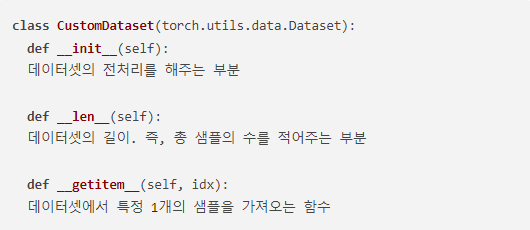

(5) 커스텀 데이터셋 (Custom Dataset)으로 선형 회귀 구현하기

In [75]:
import torch
import torch.nn.functional as F
from torch.utils.data import Dataset
from torch.utils.data import DataLoader

In [76]:
# Dataset 상속
class CustomDataset(Dataset):
  def __init__(self):
    self.x_data = [[73,80,75],
                   [93,88,93],
                   [89,91,90],
                   [73,66,70]]
    self.y_data = [[152],[185],[180],[196],[142]]

  # 총 데이터의 개수를 리턴
  def __len__(self):
    return len(self.x_data)

  # 인덱스를 입력받아 그에 맵핑되는 입출력 데이터를 파이토치의 Tensor 형태로 리턴
  def __getitem__(self, idx):
    x = torch.FloatTensor(self.x_data[idx])
    y = torch.FloatTensor(self.y_data[idx])
    return x, y

In [77]:
dataset = CustomDataset()
dataloader = DataLoader(dataset, batch_size=2, shuffle=True)

In [78]:
model = torch.nn.Linear(3,1)
optimizer = torch.optim.SGD(model.parameters(), lr=1e-5)

In [79]:
nb_epochs = 20
for epoch in range(nb_epochs + 1):
  for batch_idx, samples in enumerate(dataloader):
    # print(batch_idx)
    # print(samples)
    x_train, y_train = samples
    # H(x) 계산
    prediction = model(x_train)

    # cost 계산
    cost = F.mse_loss(prediction, y_train)

    # cost로 H(x) 계산
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    print('Epoch {:4d}/{} Batch {}/{} Cost: {:.6f}'.format(
        epoch, nb_epochs, batch_idx+1, len(dataloader),
        cost.item()
        ))

Epoch    0/20 Batch 1/2 Cost: 11310.050781
Epoch    0/20 Batch 2/2 Cost: 7518.619629
Epoch    1/20 Batch 1/2 Cost: 881.812866
Epoch    1/20 Batch 2/2 Cost: 2245.005615
Epoch    2/20 Batch 1/2 Cost: 1436.496704
Epoch    2/20 Batch 2/2 Cost: 76.114395
Epoch    3/20 Batch 1/2 Cost: 26.543261
Epoch    3/20 Batch 2/2 Cost: 1291.126465
Epoch    4/20 Batch 1/2 Cost: 1049.664551
Epoch    4/20 Batch 2/2 Cost: 252.901520
Epoch    5/20 Batch 1/2 Cost: 115.478119
Epoch    5/20 Batch 2/2 Cost: 1235.923950
Epoch    6/20 Batch 1/2 Cost: 150.365128
Epoch    6/20 Batch 2/2 Cost: 1148.074951
Epoch    7/20 Batch 1/2 Cost: 183.998566
Epoch    7/20 Batch 2/2 Cost: 1130.558472
Epoch    8/20 Batch 1/2 Cost: 929.237244
Epoch    8/20 Batch 2/2 Cost: 459.313873
Epoch    9/20 Batch 1/2 Cost: 1058.207397
Epoch    9/20 Batch 2/2 Cost: 323.838959
Epoch   10/20 Batch 1/2 Cost: 1137.083374
Epoch   10/20 Batch 2/2 Cost: 181.556534
Epoch   11/20 Batch 1/2 Cost: 91.919891
Epoch   11/20 Batch 2/2 Cost: 1254.021973
Epoch 

In [80]:
# 임의의 입력 [73, 80, 75]를 선언
new_var =  torch.FloatTensor([[73, 80, 75]])
# 입력한 값 [73, 80, 75]에 대해서 예측값 y를 리턴받아서 pred_y에 저장
pred_y = model(new_var)
print("훈련 후 입력이 73, 80, 75일 때의 예측값 :", pred_y)

훈련 후 입력이 73, 80, 75일 때의 예측값 : tensor([[159.3338]], grad_fn=<AddmmBackward0>)


##**03-05. 벡터와 행렬 연산 복습하기**

(1) 벡터와 행렬과 텐서

(2) 텐서

In [81]:
import numpy as np

In [82]:
# 0차원 텐서 (스칼라)
d = np.array(5)
print('텐서의 차원 :', d.ndim)
print('텐서의 크기(shape) :', d.shape)

텐서의 차원 : 0
텐서의 크기(shape) : ()


ndim을 출력했을 때 나오는 값을 **축(axis)의 개수** 또는 **텐서의 차원**이라고 부른다.

In [83]:
# 1차원 텐서 (벡터)
d = np.array([1,2,3,4])
print('텐서의 차원 :', d.ndim)
print('텐서의 크기(shape) :', d.shape)

텐서의 차원 : 1
텐서의 크기(shape) : (4,)


- 벡터에서의 차원: 하나의 축에 놓인 원소의 개수
- 텐서에서의 차원: 축의 개수

In [84]:
# 2차원 텐서 (행렬)
d = np.array([[1,2,3,4],[5,6,7,8],[9,10,11,12]])
print('텐서의 차원 :', d.ndim)
print('텐서의 크기(shape) :', d.shape)

텐서의 차원 : 2
텐서의 크기(shape) : (3, 4)


- 텐서의 크기: 각 축을 따라서 얼마나 많은 차원이 있는지를 나타낸 값

In [86]:
# 3차원 텐서 (다차원 배열)
d = np.array([
    [[1,2,3,4,5],[6,7,8,9,10],[10,11,12,13,14]],
     [[15,16,17,18,19],[19,20,21,22,23],[23,24,25,26,27]]
])
print('텐서의 차원 :', d.ndim)
print('텐서의 크기(shape) :', d.shape)

텐서의 차원 : 3
텐서의 크기(shape) : (2, 3, 5)


(3) 벡터와 행렬의 연산

In [87]:
import numpy as np

In [88]:
# 벡터의 덧셈과 뺄셈
A = np.array([8,4,5])
B = np.array([1,2,3])
print('두 벡터의 합 :', A+B)
print('두 벡터의 차 :', A-B)

두 벡터의 합 : [9 6 8]
두 벡터의 차 : [7 2 2]


In [89]:
# 행렬의 덧셈과 뺄셈
A = np.array([[10, 20, 30, 40], [50, 60, 70, 80]])
B = np.array([[5, 6, 7, 8],[1, 2, 3, 4]])
print('두 행렬의 합 :')
print(A + B)
print('두 행렬의 차 :')
print(A - B)

두 행렬의 합 :
[[15 26 37 48]
 [51 62 73 84]]
두 행렬의 차 :
[[ 5 14 23 32]
 [49 58 67 76]]


In [90]:
# 벡터의 내적
A = np.array([1, 2, 3])
B = np.array([4, 5, 6])
print('두 벡터의 내적 :',np.dot(A, B))

두 벡터의 내적 : 32


In [91]:
# 행렬의 곱셈
A = np.array([[1, 3],[2, 4]])
B = np.array([[5, 7],[6, 8]])
print('두 행렬의 행렬곱 :')
print(np.matmul(A, B))

두 행렬의 행렬곱 :
[[23 31]
 [34 46]]


(4) 다중 선형 회귀 행렬 연산으로 이해하기

(5) 샘플(Sample)과 특성(Feature)

- 머신러닝에서는 데이터를 셀 수 있는 단위로 구분할 때, 각각을 **샘플**이라고 부른다.
- 종속변수 y를 예측하기 위한 각각의 독립변수 x를 **특성**이라고 부른다.

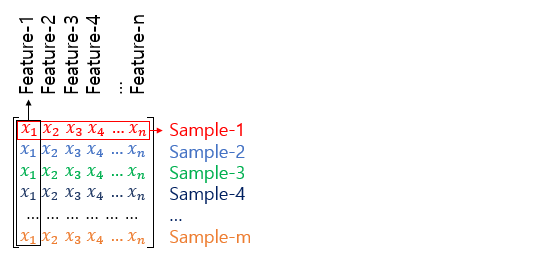

(6) 가중치와 편행 행렬의 크기 결정